<a href="https://colab.research.google.com/github/Nobel712/Deep-learning-project/blob/main/Mullbary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/Deep_Db/Mulberry Leaf Dataset.zip','r') as zip:
  zip.extractall('/content')

In [ ]:
X_train = []
y_train = []
image_size = 150
labels = ['01 ChiangMai60','02 RedKing','03 WhiteKing','04 BlackOodTurkey','05 TaiwanStraberry','06 BlackAustralia','07 Buriram60','08 Kamphaengsaeng42','09 TaiwanMeacho','10 ChiangMaiBuriram60']
for i in labels:
    folderPath = os.path.join('/content/Mulberry Leaf Dataset/Training set',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/Mulberry Leaf Dataset/Test set',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_train.shape,y_train.shape

((5262, 150, 150, 3), (5262,))

In [ ]:
y_train

array(['01 ChiangMai60', '01 ChiangMai60', '01 ChiangMai60', ...,
       '10 ChiangMaiBuriram60', '10 ChiangMaiBuriram60',
       '10 ChiangMaiBuriram60'], dtype='<U21')

In [ ]:

classes=['01 ChiangMai60','02 RedKing','03 WhiteKing','04 BlackOodTurkey','05 TaiwanStraberry','06 BlackAustralia','07 Buriram60','08 Kamphaengsaeng42','09 TaiwanMeacho','10 ChiangMaiBuriram60']

In [ ]:

X_train,y_train=shuffle(X_train,y_train,random_state=42)
X_train.shape

(5262, 150, 150, 3)

In [ ]:


X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=.2,random_state=42)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:

images_dict = dict()
x_train_dict=dict()
for i, l in enumerate(y_train_new):
  if len(images_dict)==10:
    break
  if l not in images_dict.keys():
    x_train_dict[l] = X_train[i]
    images_dict[l] = X_train[i].reshape((150, 150,3))
images_dict = dict(sorted(images_dict.items()))
x_trian_each_class = [x_train_dict[i] for i in sorted(x_train_dict)]
x_train_each_class = np.asarray(x_trian_each_class)

# example image for each class for test set
X_test_dict = dict()
for i, l in enumerate(y_test_new):
  if len(X_test_dict)==10:
    break
  if l not in X_test_dict.keys():
    X_test_dict[l] = X_test[i]
# order by class
x_test_each_class = [X_test_dict[i] for i in sorted(X_test_dict)]
x_test_each_class = np.asarray(x_test_each_class)

In [ ]:

y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

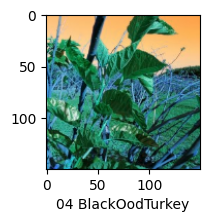

In [ ]:


plot_sample(X_train,y_train_new,0)

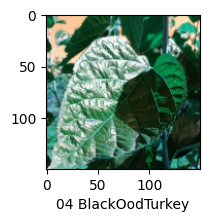

In [ ]:
plot_sample(X_train,y_train_new,6)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
model = Sequential() #step 1
model.add(Conv2D(filters = 256, kernel_size = 2,input_shape=(image_size,image_size,3),padding='same')) #step2
model.add(Activation('relu'))  # step3
model.add(MaxPooling2D(pool_size=2)) #step4
model.add(Conv2D(filters =256,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 32
model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again
model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 64
model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again
model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 64
model.add(GlobalAveragePooling2D()) #repeating step 4 again
model.add(Dropout(0.2)) # step5
model.add(Flatten()) #step 6
model.add(Dense(150)) #step 7
model.add(Activation('relu')) # setp 3
model.add(Dropout(0.2)) # step 5
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Nadam(0.0001), metrics= ['accuracy'])
# callbacks
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau

early_stop = EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 1, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 2, verbose = 1)

In [ ]:

history = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs =300, verbose=1, batch_size=32,callbacks = [early_stop, reduce_lr])

Epoch 1/300
132/132 [==============================] - 25s 167ms/step - loss: 1.3628 - accuracy: 0.5132 - val_loss: 1.1970 - val_accuracy: 0.5670 - lr: 1.0000e-04
Epoch 2/300
132/132 [==============================] - 21s 157ms/step - loss: 1.3107 - accuracy: 0.5248 - val_loss: 1.0723 - val_accuracy: 0.6277 - lr: 1.0000e-04
Epoch 3/300
132/132 [==============================] - 22s 168ms/step - loss: 1.2392 - accuracy: 0.5626 - val_loss: 1.0527 - val_accuracy: 0.6192 - lr: 1.0000e-04
Epoch 4/300
132/132 [==============================] - 22s 166ms/step - loss: 1.2139 - accuracy: 0.5731 - val_loss: 1.0481 - val_accuracy: 0.6325 - lr: 1.0000e-04
Epoch 5/300
132/132 [==============================] - 21s 157ms/step - loss: 1.1685 - accuracy: 0.5821 - val_loss: 0.9499 - val_accuracy: 0.6752 - lr: 1.0000e-04
Epoch 6/300
132/132 [==============================] - 22s 166ms/step - loss: 1.1236 - accuracy: 0.5978 - val_loss: 0.9395 - val_accuracy: 0.6876 - lr: 1.0000e-04
Epoch 7/300
132/132 [=

In [ ]:
! pip install bayesian-optimization


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
from bayes_opt import BayesianOptimization
score_acc = make_scorer(accuracy_score)


In [ ]:
# def nn_cl_bo(neurons, activation, optimizer, learning_rate, batch_size, epochs):
#     optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
#     optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
#                  'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
#                  'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
#                  'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
#     activationL = ['relu', 'softplus', 'softsign', 'tanh', 'selu',
#                    'elu', 'exponential', LeakyReLU,'relu']
#     neurons = round(neurons)
#     activation = activationL[round(activation)]
#     batch_size = round(batch_size)
#     epochs = round(epochs)

#     def nn_cl_fun():
#         opt = optimizerD[optimizer]
#         nn = Sequential()
#         nn.add(Conv2D(neurons, (3, 3), activation=activation, input_shape=(image_size, image_size, 3)))
#         nn.add(Flatten())
#         nn.add(Dense(256, activation=activation))
#         nn.add(Dense(10, activation='softmax'))
#         nn.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#         return nn

#     es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
#     nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
#     kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
#     score = cross_val_score(nn, X_train, y_train, scoring='accuracy', cv=kfold, fit_params={'callbacks':[es]}).mean()

#     return score


In [ ]:
# params_nn ={
#     'neurons': (10, 100),
#     'activation':(0, 9),
#     'optimizer':(0,7),
#     'learning_rate':(0.01, 0.0001),
#     'batch_size':(200, 1000),
#     'epochs':(20, 100)
# }
# # Run Bayesian Optimization
# nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=111)
# nn_bo.maximize(init_points=25, n_iter=5)

|   iter    |  target   | activa... | batch_... |  epochs   | learni... |  neurons  | optimizer |
-------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adadelta.py:82: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adagrad.py:84: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras

ValueError: ignored

In [ ]:
### Import necessary packages
import tensorflow as tf

def ECA(self, x):
    k_size = 3
    squeeze = tf.reduce_mean(x,[2,3],keep_dims=False)
    squeeze = tf.expand_dims(squeeze, axis=1)
    attn = tf.layers.Conv1D(filters=1,
    kernel_size=k_size,
    padding='same',
    kernel_initializer=conv_kernel_initializer(),
    use_bias=False,
    data_format=self._data_format)(squeeze)

    attn = tf.expand_dims(tf.transpose(attn, [0, 2, 1]), 3)
    attn = tf.math.sigmoid(attn)
    scale = x * attn
    return x * attn

In [ ]:
m_size=(image_size)
effnet =tf.keras.applications.efficientnet_v2.EfficientNetV2L(weights='imagenet',include_top=False,input_shape=(m_size,m_size,3))
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(10,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(0.0001), metrics= ['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

473176280/473176280 [==============================] - 23s 0us/step


In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs =20, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/20
132/132 [==============================] - ETA: 0s - loss: 1.1933 - accuracy: 0.5959
Epoch 1: val_accuracy improved from -inf to 0.86610, saving model to effnet.h5
132/132 [==============================] - 349s 1s/step - loss: 1.1933 - accuracy: 0.5959 - val_loss: 0.3928 - val_accuracy: 0.8661 - lr: 1.0000e-04
Epoch 2/20
 70/132 [==============>...............] - ETA: 50s - loss: 0.2911 - accuracy: 0.9018

KeyboardInterrupt: ignored

In [ ]:
effnet =tf.keras.applications.efficientnet_v2.EfficientNetV2L(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(10,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(0.0001), metrics= ['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

473176280/473176280 [==============================] - 2s 0us/step


In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs =20, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/20
132/132 [==============================] - ETA: 0s - loss: 1.2337 - accuracy: 0.5761
Epoch 1: val_accuracy improved from -inf to 0.84710, saving model to effnet.h5
132/132 [==============================] - 327s 970ms/step - loss: 1.2337 - accuracy: 0.5761 - val_loss: 0.4328 - val_accuracy: 0.8471 - lr: 1.0000e-04
Epoch 2/20
132/132 [==============================] - ETA: 0s - loss: 0.2684 - accuracy: 0.9178
Epoch 2: val_accuracy improved from 0.84710 to 0.90123, saving model to effnet.h5
132/132 [==============================] - 122s 927ms/step - loss: 0.2684 - accuracy: 0.9178 - val_loss: 0.2883 - val_accuracy: 0.9012 - lr: 1.0000e-04
Epoch 3/20
132/132 [==============================] - ETA: 0s - loss: 0.0910 - accuracy: 0.9755
Epoch 3: val_accuracy improved from 0.90123 to 0.92118, saving model to effnet.h5
132/132 [==============================] - 118s 897ms/step - loss: 0.0910 - accuracy: 0.9755 - val_loss: 0.2079 - val_accuracy: 0.9212 - lr: 1.0000e-04
Epoch 4/20
13

In [ ]:
effnet =tf.keras.applications.EfficientNetV2B3(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(10,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(0.0001), metrics= ['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

52606240/52606240 [==============================] - 4s 0us/step


In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs =20, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/20
132/132 [==============================] - ETA: 0s - loss: 1.7592 - accuracy: 0.4172
Epoch 1: val_accuracy improved from -inf to 0.72840, saving model to effnet.h5
132/132 [==============================] - 110s 239ms/step - loss: 1.7592 - accuracy: 0.4172 - val_loss: 0.9493 - val_accuracy: 0.7284 - lr: 1.0000e-04
Epoch 2/20
132/132 [==============================] - ETA: 0s - loss: 0.7300 - accuracy: 0.7923
Epoch 2: val_accuracy improved from 0.72840 to 0.90123, saving model to effnet.h5
132/132 [==============================] - 28s 215ms/step - loss: 0.7300 - accuracy: 0.7923 - val_loss: 0.3633 - val_accuracy: 0.9012 - lr: 1.0000e-04
Epoch 3/20
132/132 [==============================] - ETA: 0s - loss: 0.3232 - accuracy: 0.9066
Epoch 3: val_accuracy improved from 0.90123 to 0.93067, saving model to effnet.h5
132/132 [==============================] - 29s 216ms/step - loss: 0.3232 - accuracy: 0.9066 - val_loss: 0.2207 - val_accuracy: 0.9307 - lr: 1.0000e-04
Epoch 4/20
132/

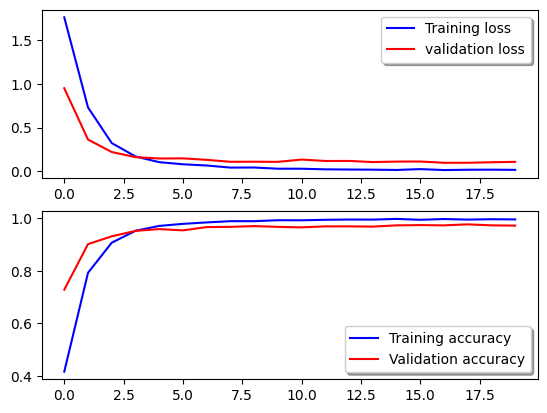

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
Y_pred=model.predict(X_test)
Y_pred[:5]

33/33 [==============================] - 4s 44ms/step


array([[3.6421145e-05, 7.4771287e-06, 8.3663081e-06, 9.9969268e-01,
        1.2462228e-04, 3.5326651e-05, 4.8473223e-05, 1.9097524e-05,
        5.6199551e-06, 2.1972188e-05],
       [5.2356813e-06, 5.8634872e-05, 9.9980420e-01, 3.8858630e-06,
        9.0023905e-06, 5.5875371e-06, 4.5908662e-05, 1.3188462e-05,
        5.1824798e-05, 2.5447341e-06],
       [7.7863435e-05, 8.0086633e-05, 1.1756266e-04, 9.2523340e-05,
        6.3996968e-06, 1.2748211e-05, 1.9931006e-04, 2.4810888e-05,
        2.7828105e-03, 9.9660599e-01],
       [1.6164823e-03, 2.0373929e-02, 1.9258924e-04, 7.7325888e-02,
        7.2523552e-01, 1.8920288e-03, 1.2098408e-01, 2.3016206e-03,
        3.6156210e-04, 4.9716290e-02],
       [9.4177094e-06, 1.5157853e-04, 9.9971217e-01, 6.4564579e-06,
        5.4575735e-06, 9.8812861e-06, 2.7761505e-05, 6.0744242e-05,
        1.3820722e-05, 2.7773804e-06]], dtype=float32)

In [ ]:
y_class=[np.argmax(x) for x in Y_pred]

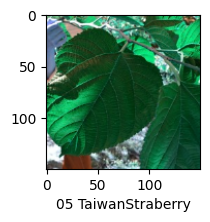

In [ ]:
plot_sample(X_test,y_test_new,5)

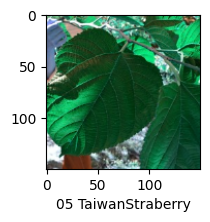

In [ ]:
plot_sample(X_test,y_test_new,5)

In [ ]:
print(classification_report(y_test_new,y_class))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       105
           1       0.98      0.91      0.94        54
           2       0.98      0.98      0.98       109
           3       0.99      0.95      0.97       103
           4       1.00      0.96      0.98       116
           5       0.93      0.99      0.96       115
           6       0.86      0.93      0.89        54
           7       0.97      1.00      0.99       100
           8       0.98      0.97      0.97       139
           9       0.99      0.99      0.99       158

    accuracy                           0.97      1053
   macro avg       0.97      0.97      0.97      1053
weighted avg       0.97      0.97      0.97      1053



In [ ]:
cm=tf.math.confusion_matrix(labels=y_test_new,predictions=y_class)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[102,   0,   0,   0,   0,   1,   1,   1,   0,   0],
       [  0,  49,   1,   1,   0,   0,   2,   0,   1,   0],
       [  0,   0, 107,   0,   0,   0,   2,   0,   0,   0],
       [  0,   0,   0,  98,   0,   2,   3,   0,   0,   0],
       [  0,   0,   0,   0, 111,   3,   0,   2,   0,   0],
       [  1,   0,   0,   0,   0, 114,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   2,  50,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 100,   0,   0],
       [  1,   0,   1,   0,   0,   1,   0,   0, 135,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1, 157]], dtype=int32)>

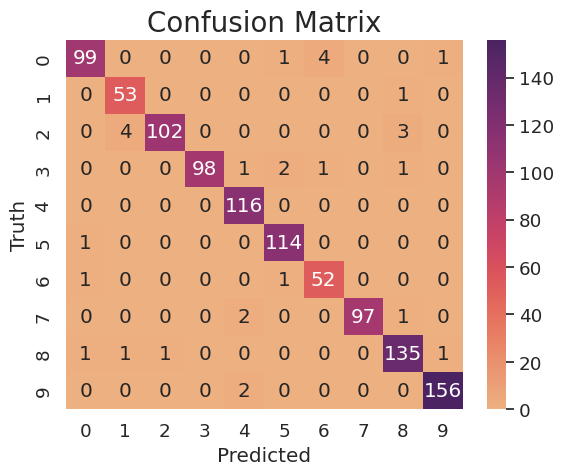

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d',cmap='flare')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

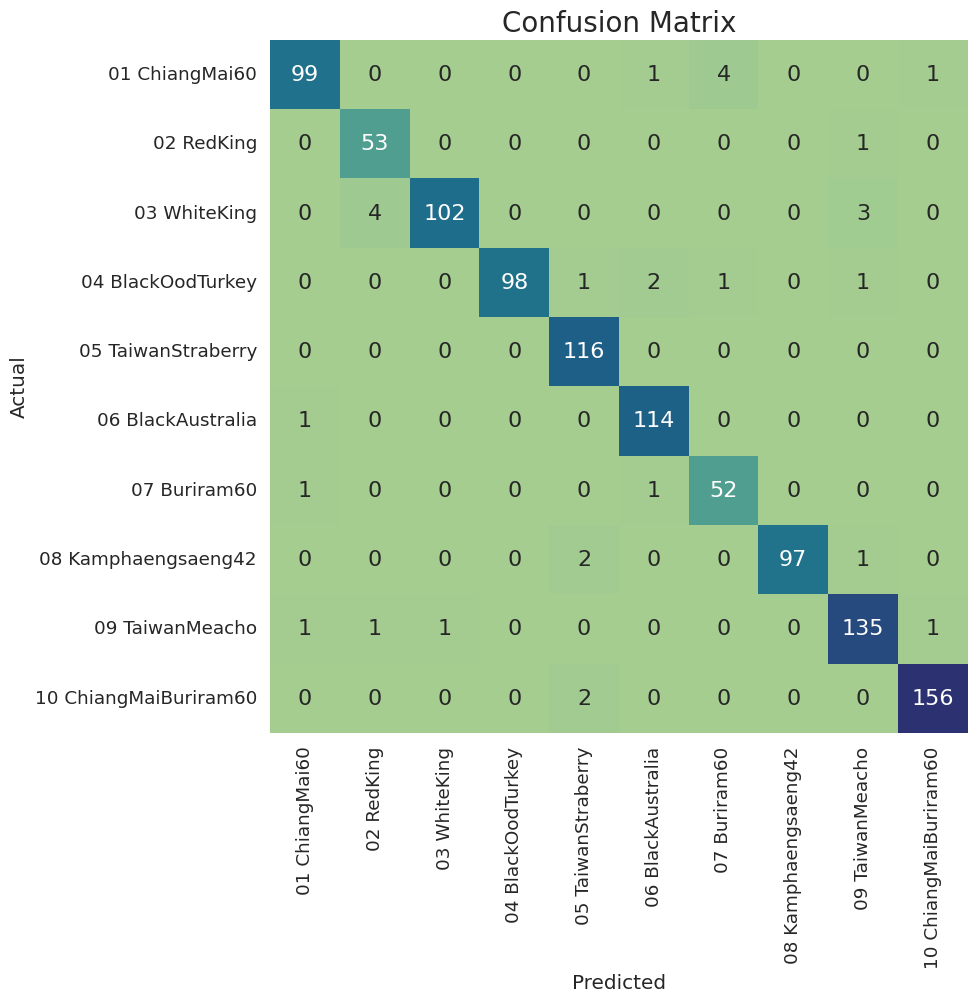

In [ ]:
cm_data = tf.math.confusion_matrix(labels=y_test_new,predictions=y_class)
cm = pd.DataFrame(cm_data, columns=classes, index =classes)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (9,9))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="crest", annot=True, annot_kws={"size": 16}, fmt='g')

In [ ]:
predictions = model.predict(x_test_each_class)
predicted_class = np.argmax(predictions, axis=1)
predicted_class

1/1 [==============================] - 1s 1s/step


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
def plot_actual_predicted(images, pred_classes):
  fig, axes = plt.subplots(2, 5, figsize=(14, 10))
  axes = axes.flatten()

  # plot
  ax = axes[0]
  dummy_array = np.array([[[0, 0, 0, 0]]], dtype='uint8')
  ax.set_title("Base reference")
  ax.set_axis_off()
  ax.imshow(dummy_array, interpolation='nearest')
  # plot image
  for k,v in images.items():
    ax = axes[int(k)]
    ax.imshow(v, cmap=plt.cm.binary)
    ax.set_title(f"True: %s \nPredict: %s" % (classes[k], classes[pred_classes[k]]))
    ax.set_axis_off()
  plt.tight_layout()
  plt.show()

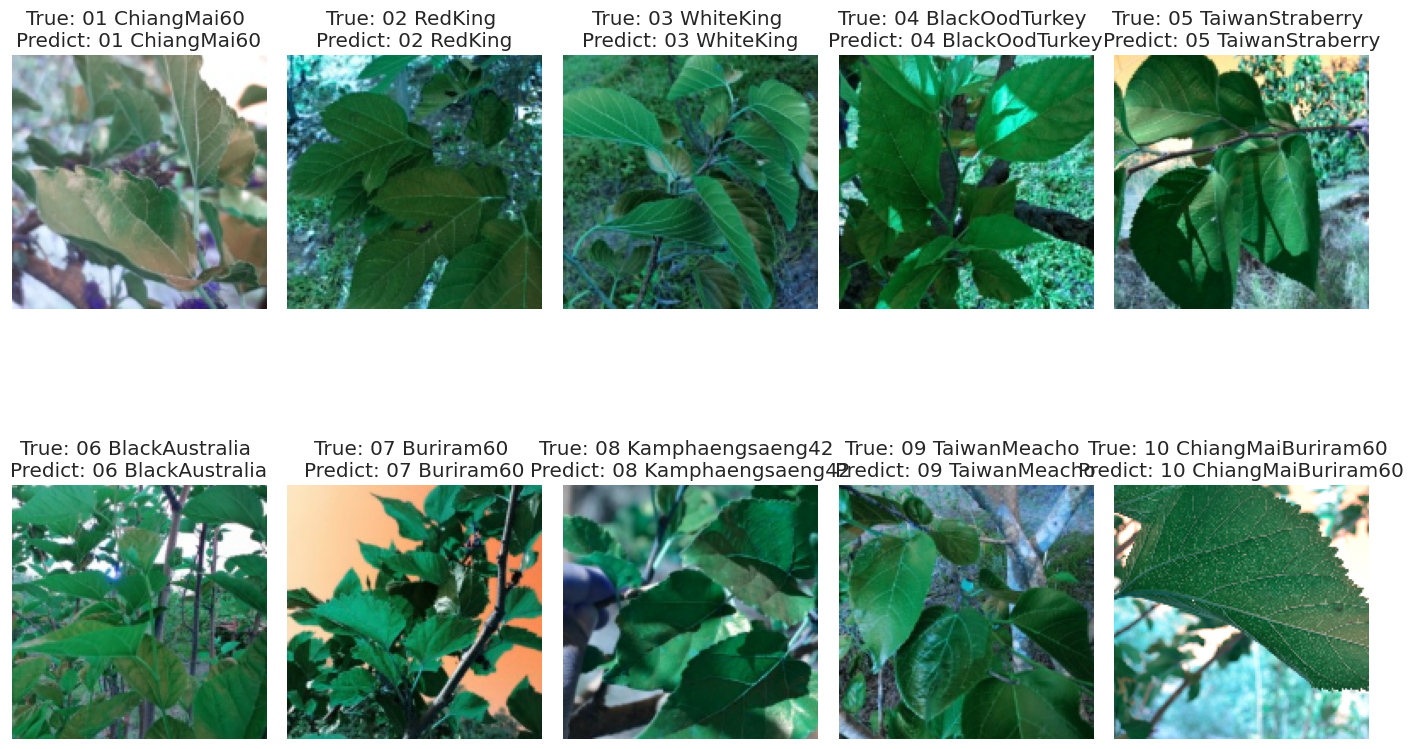

In [ ]:
plot_actual_predicted(images_dict, predicted_class)

Shap

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 12.0 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
masker = shap.maskers.Image("inpaint_telea", X_train[0].shape)

explainer = shap.Explainer(model, masker, output_names=classes)

explainer

In [ ]:
shap_values = explainer(x_test_each_class, outputs=shap.Explanation.argsort.flip[:5])

shap_values.shape

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  10%|█         | 1/10 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  30%|███       | 3/10 [00:45<01:11, 10.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  40%|████      | 4/10 [01:05<01:26, 14.44s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 5/10 [01:26<01:22, 16.60s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  60%|██████    | 6/10 [01:49<01:15, 18.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  70%|███████   | 7/10 [02:08<00:56, 18.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  80%|████████  | 8/10 [02:29<00:39, 19.57s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  90%|█████████ | 9/10 [02:50<00:20, 20.26s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 10/10 [03:12<00:00, 20.76s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 11it [03:35, 21.56s/it]


(10, 150, 150, 3, 5)

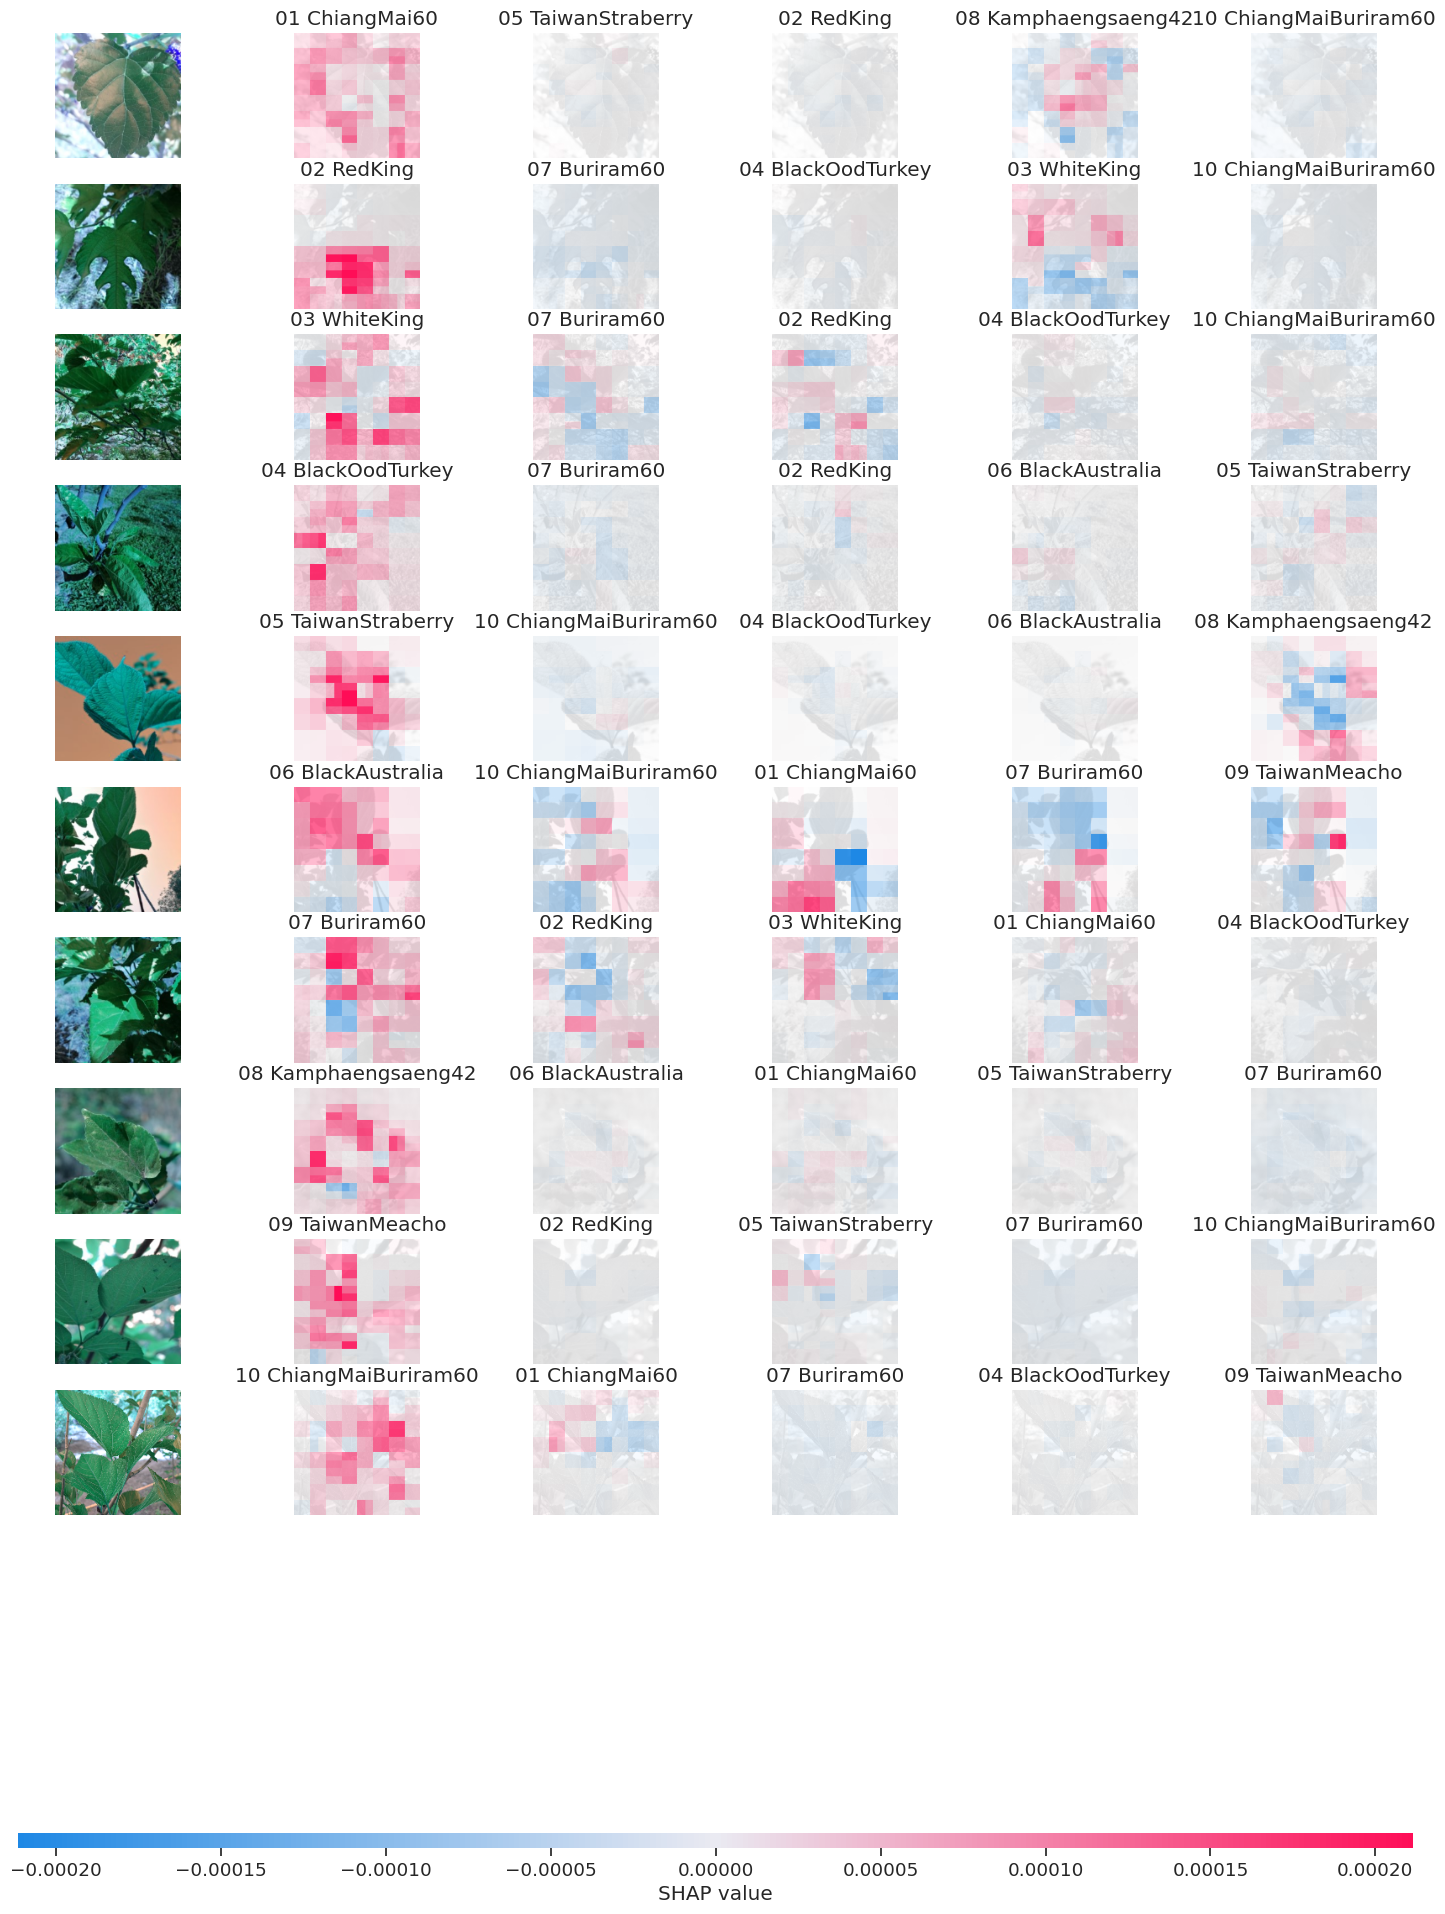

In [ ]:
shap.image_plot(shap_values)

grad-cam

In [ ]:
from pathlib import Path

In [ ]:
image_dir = Path('/content/Mulberry Leaf Dataset/Training set')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Drop GT images
image_df = image_df[image_df['Label'].apply(lambda x: x[-2:] != 'GT')]

In [ ]:
image_df.shape

(2528, 2)

In [ ]:
image_dir = Path('/content/Mulberry Leaf Dataset/Test set')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
test_image = pd.concat([filepaths, labels], axis=1)

# Drop GT images
test_image = image_df[image_df['Label'].apply(lambda x: x[-2:] != 'GT')]

In [ ]:
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(3)

Filepath           Label
0  /content/Mulberry Leaf Dataset/Training set/02...      02 RedKing
1  /content/Mulberry Leaf Dataset/Training set/01...  01 ChiangMai60
2  /content/Mulberry Leaf Dataset/Training set/07...    07 Buriram60

In [ ]:
test_image = test_image.sample(frac=1).reset_index(drop = True)

# Show the result
test_image.head(3)

Filepath         Label
0  /content/Mulberry Leaf Dataset/Training set/07...  07 Buriram60
1  /content/Mulberry Leaf Dataset/Training set/03...  03 WhiteKing
2  /content/Mulberry Leaf Dataset/Training set/02...    02 RedKing

In [ ]:
image_df.shape

(2528, 2)

In [ ]:
train_df, test_df = train_test_split(image_df, train_size=0.9, shuffle=False, random_state=1)

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=test_image ,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1820 validated image filenames belonging to 8 classes.
Found 505 validated image filenames belonging to 8 classes.
Found 253 validated image filenames belonging to 8 classes.


In [ ]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(8, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=1,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
57/57 [==============================] - 17s 184ms/step - loss: 1.2930 - accuracy: 0.5357 - val_loss: 0.8256 - val_accuracy: 0.6653
Epoch 2/10
57/57 [==============================] - 6s 111ms/step - loss: 0.6202 - accuracy: 0.7901 - val_loss: 0.5188 - val_accuracy: 0.8198
Epoch 3/10
57/57 [==============================] - 7s 131ms/step - loss: 0.4245 - accuracy: 0.8566 - val_loss: 0.3320 - val_accuracy: 0.9050
Epoch 4/10
57/57 [==============================] - 6s 110ms/step - loss: 0.2877 - accuracy: 0.9104 - val_loss: 0.2816 - val_accuracy: 0.9109
Epoch 5/10
57/57 [==============================] - 9s 154ms/step - loss: 0.1908 - accuracy: 0.9407 - val_loss: 0.1660 - val_accuracy: 0.9465
Epoch 6/10
57/57 [==============================] - 7s 117ms/step - loss: 0.1258 - accuracy: 0.9731 - val_loss: 0.1622 - val_accuracy: 0.9485
Epoch 7/10
57/57 [==============================] - 8s 132ms/step - loss: 0.1163 - accuracy: 0.9665 - val_loss: 0.1459 - val_accuracy: 0.9525
Epoch

In [ ]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

8/8 [==============================] - 2s 223ms/step
The first 5 predictions: ['04 BlackOodTurkey', '03 WhiteKing', '03 WhiteKing', '04 BlackOodTurkey', '06 BlackAustralia']


In [ ]:
import matplotlib.cm as cm

In [ ]:
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size "size"
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
#     display(Image(cam_path))

    return cam_path

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

last_conv_layer_name = "Conv_1"
img_size = (224,224)

# Remove last layer's softmax
model.layers[-1].activation = None

<ipython-input-123-1922c723171e>:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


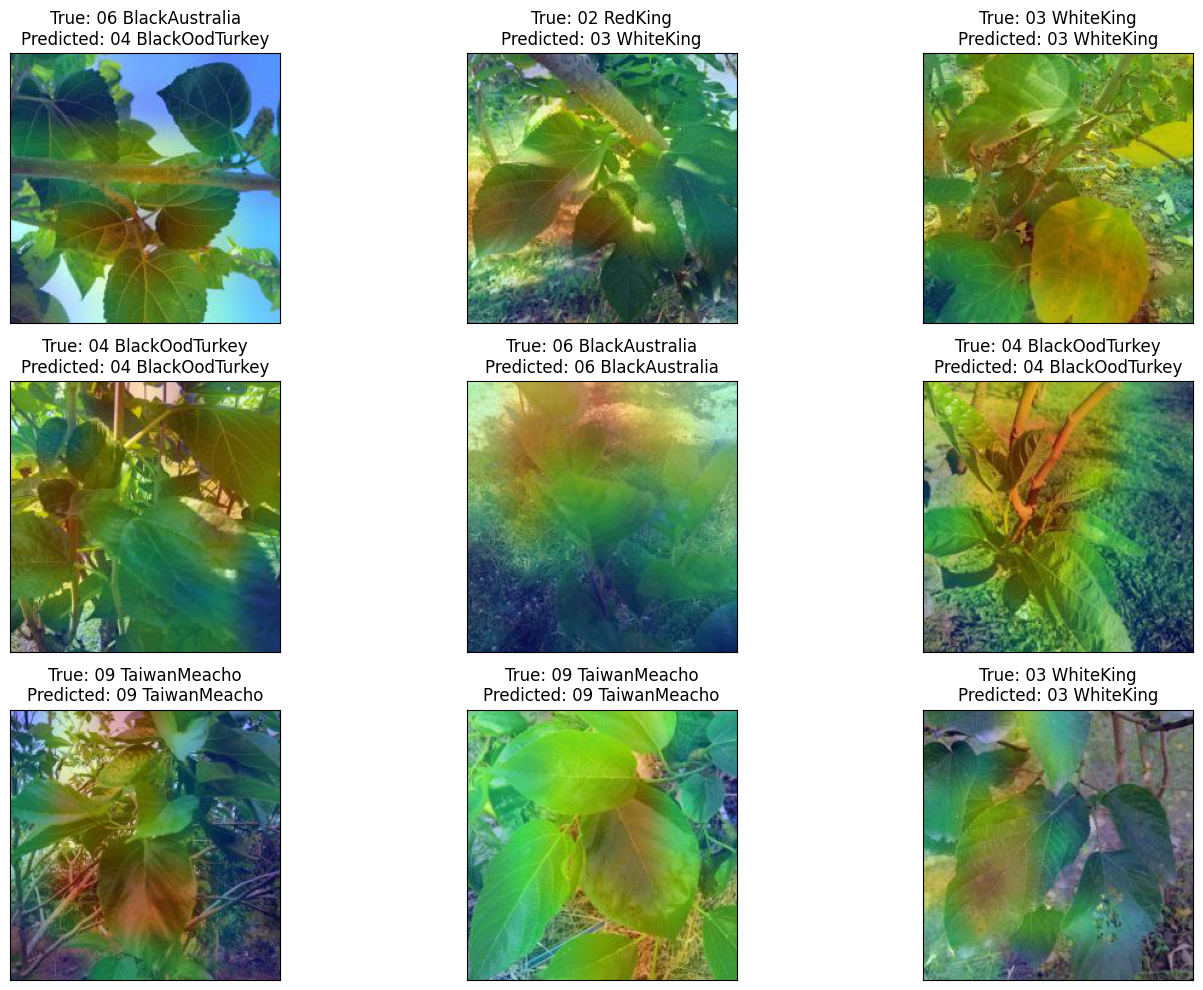

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img_path = test_df.Filepath.iloc[i]
    img_array = preprocess_input(get_img_array(img_path, size=img_size))
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    cam_path = save_and_display_gradcam(img_path, heatmap)
    ax.imshow(plt.imread(cam_path))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
m_size=(image_size)
effnet =tf.keras.applications.EfficientNetV2B3(weights='imagenet',include_top=False,input_shape=(m_size,m_size,3))
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(10,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)
model.summary()


52606240/52606240 [==============================] - 4s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 150, 150, 3)  0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)          

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Nadam(0.0001), metrics= ['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs =20, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/20
132/132 [==============================] - ETA: 0s - loss: 1.8072 - accuracy: 0.3835
Epoch 1: val_accuracy improved from -inf to 0.71890, saving model to effnet.h5
132/132 [==============================] - 164s 290ms/step - loss: 1.8072 - accuracy: 0.3835 - val_loss: 1.0338 - val_accuracy: 0.7189 - lr: 1.0000e-04
Epoch 2/20
132/132 [==============================] - ETA: 0s - loss: 0.7469 - accuracy: 0.7871
Epoch 2: val_accuracy improved from 0.71890 to 0.88794, saving model to effnet.h5
132/132 [==============================] - 33s 250ms/step - loss: 0.7469 - accuracy: 0.7871 - val_loss: 0.3934 - val_accuracy: 0.8879 - lr: 1.0000e-04
Epoch 3/20
132/132 [==============================] - ETA: 0s - loss: 0.3442 - accuracy: 0.9021
Epoch 3: val_accuracy improved from 0.88794 to 0.92877, saving model to effnet.h5
132/132 [==============================] - 35s 262ms/step - loss: 0.3442 - accuracy: 0.9021 - val_loss: 0.2227 - val_accuracy: 0.9288 - lr: 1.0000e-04
Epoch 4/20
132/

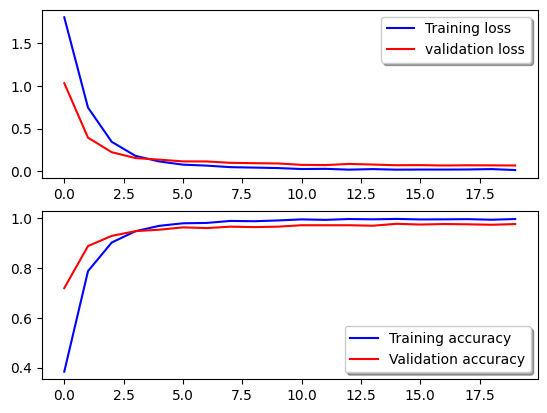

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
Y_pred=model.predict(X_test)

y_class=[np.argmax(x) for x in Y_pred]

33/33 [==============================] - 1s 44ms/step


In [ ]:
cf_mtx = confusion_matrix(y_test_new,y_class)


group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(6, 6)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels= classes, yticklabels= classes,
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

TypeError: ignored

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

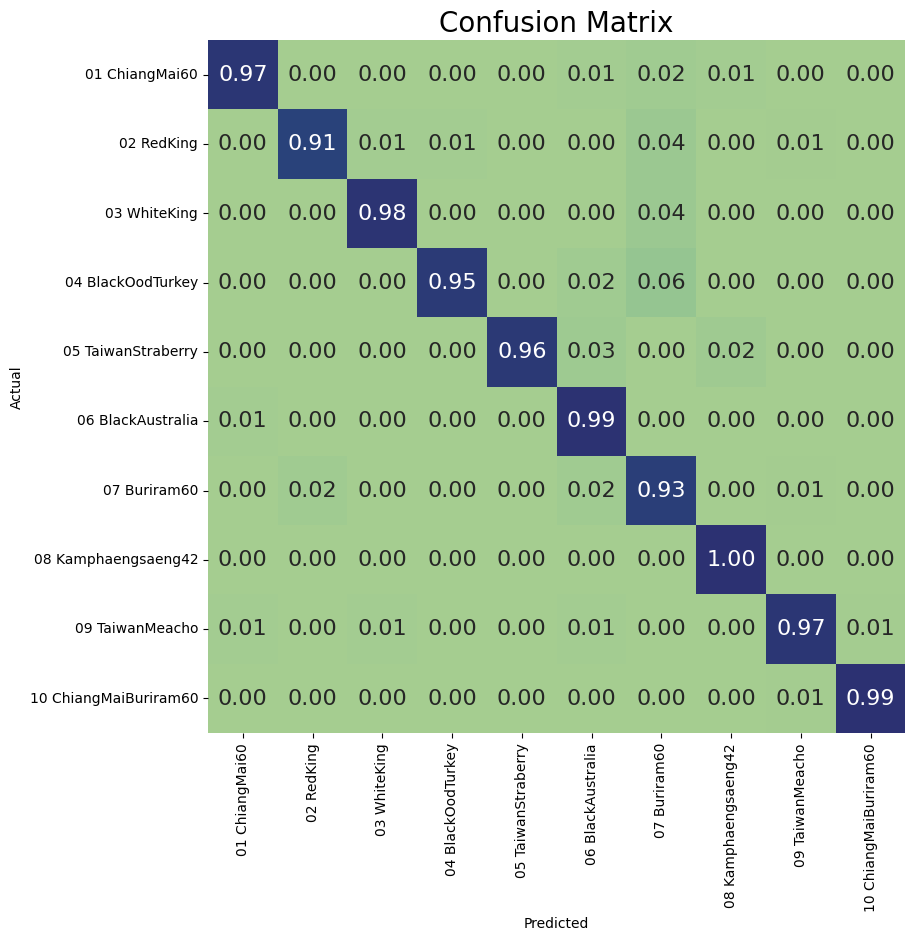

In [ ]:
cm_data = tf.math.confusion_matrix(labels=y_test_new,predictions=y_class)
cm = pd.DataFrame(cm_data, columns=classes, index =classes)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (9,9))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
cm = cm.astype('float') / cm.sum(axis=1)
sns.heatmap(cm, cbar=False, cmap="crest", annot=True, annot_kws={"size": 16},fmt = '.2f')

In [ ]:
effnet =tf.keras.applications.DenseNet201(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

In [ ]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(10,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:

model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(), metrics= ['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs =20, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/20
132/132 [==============================] - ETA: 0s - loss: 1.3503 - accuracy: 0.5707
Epoch 1: val_accuracy improved from -inf to 0.18424, saving model to effnet.h5
132/132 [==============================] - 163s 333ms/step - loss: 1.3503 - accuracy: 0.5707 - val_loss: 15.7404 - val_accuracy: 0.1842 - lr: 0.0010
Epoch 2/20
132/132 [==============================] - ETA: 0s - loss: 0.6880 - accuracy: 0.7819
Epoch 2: val_accuracy improved from 0.18424 to 0.38557, saving model to effnet.h5
132/132 [==============================] - 41s 311ms/step - loss: 0.6880 - accuracy: 0.7819 - val_loss: 5.9695 - val_accuracy: 0.3856 - lr: 0.0010
Epoch 3/20
132/132 [==============================] - ETA: 0s - loss: 0.5996 - accuracy: 0.8064
Epoch 3: val_accuracy improved from 0.38557 to 0.41880, saving model to effnet.h5
132/132 [==============================] - 41s 312ms/step - loss: 0.5996 - accuracy: 0.8064 - val_loss: 5.7627 - val_accuracy: 0.4188 - lr: 0.0010
Epoch 4/20
132/132 [======

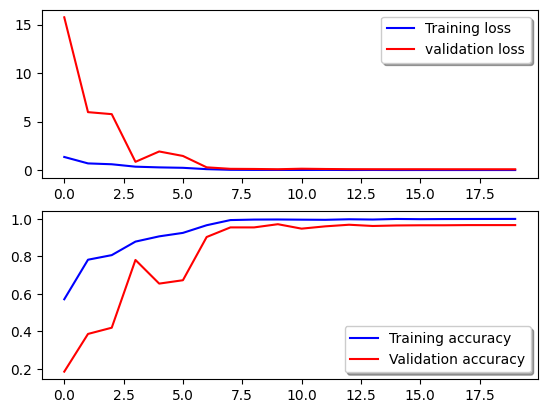

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
effnet =tf.keras.applications.VGG16(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(10,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)
model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(0.0001), metrics= ['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs =50, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/50
132/132 [==============================] - ETA: 0s - loss: 2.3104 - accuracy: 0.1326
Epoch 1: val_accuracy improved from -inf to 0.15005, saving model to effnet.h5
132/132 [==============================] - 36s 270ms/step - loss: 2.3104 - accuracy: 0.1326 - val_loss: 2.3015 - val_accuracy: 0.1500 - lr: 1.0000e-04
Epoch 2/50
132/132 [==============================] - ETA: 0s - loss: 2.3012 - accuracy: 0.1433
Epoch 2: val_accuracy did not improve from 0.15005
132/132 [==============================] - 28s 211ms/step - loss: 2.3012 - accuracy: 0.1433 - val_loss: 2.3003 - val_accuracy: 0.1500 - lr: 1.0000e-04
Epoch 3/50
132/132 [==============================] - ETA: 0s - loss: 2.3003 - accuracy: 0.1433
Epoch 3: val_accuracy did not improve from 0.15005

Epoch 3: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
132/132 [==============================] - 28s 213ms/step - loss: 2.3003 - accuracy: 0.1433 - val_loss: 2.2991 - val_accuracy: 0.1500 - lr: 1.0000e-04


KeyboardInterrupt: ignored

InceptionV3

In [ ]:
effnet =tf.keras.applications.inception_v3.InceptionV3(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(10,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:

model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(0.0001), metrics= ['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs =50, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/50
132/132 [==============================] - ETA: 0s - loss: 1.5450 - accuracy: 0.4628
Epoch 1: val_accuracy improved from -inf to 0.66002, saving model to effnet.h5
132/132 [==============================] - 66s 172ms/step - loss: 1.5450 - accuracy: 0.4628 - val_loss: 1.0291 - val_accuracy: 0.6600 - lr: 1.0000e-04
Epoch 2/50
132/132 [==============================] - ETA: 0s - loss: 0.5335 - accuracy: 0.8280
Epoch 2: val_accuracy improved from 0.66002 to 0.80152, saving model to effnet.h5
132/132 [==============================] - 16s 123ms/step - loss: 0.5335 - accuracy: 0.8280 - val_loss: 0.5972 - val_accuracy: 0.8015 - lr: 1.0000e-04
Epoch 3/50
132/132 [==============================] - ETA: 0s - loss: 0.1898 - accuracy: 0.9420
Epoch 3: val_accuracy improved from 0.80152 to 0.85280, saving model to effnet.h5
132/132 [==============================] - 16s 122ms/step - loss: 0.1898 - accuracy: 0.9420 - val_loss: 0.4589 - val_accuracy: 0.8528 - lr: 1.0000e-04
Epoch 4/50
132/1

MobileNetV2

In [ ]:
effnet =tf.keras.applications.MobileNetV2(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(10,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:

model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(0.0001), metrics= ['accuracy'])

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs =50, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/50
132/132 [==============================] - ETA: 0s - loss: 1.6333 - accuracy: 0.4562
Epoch 1: val_accuracy improved from -inf to 0.17094, saving model to effnet.h5
132/132 [==============================] - 45s 95ms/step - loss: 1.6333 - accuracy: 0.4562 - val_loss: 4.3535 - val_accuracy: 0.1709 - lr: 1.0000e-04
Epoch 2/50
131/132 [============================>.] - ETA: 0s - loss: 0.5751 - accuracy: 0.8089
Epoch 2: val_accuracy improved from 0.17094 to 0.31339, saving model to effnet.h5
132/132 [==============================] - 10s 73ms/step - loss: 0.5761 - accuracy: 0.8085 - val_loss: 3.2397 - val_accuracy: 0.3134 - lr: 1.0000e-04
Epoch 3/50
131/132 [============================>.] - ETA: 0s - loss: 0.2686 - accuracy: 0.9139
Epoch 3: val_accuracy improved from 0.31339 to 0.48908, saving model to effnet.h5
132/132 [==============================] - 10s 76ms/step - loss: 0.2688 - accuracy: 0.9138 - val_loss: 2.1678 - val_accuracy: 0.4891 - lr: 1.0000e-04
Epoch 4/50
131/132 

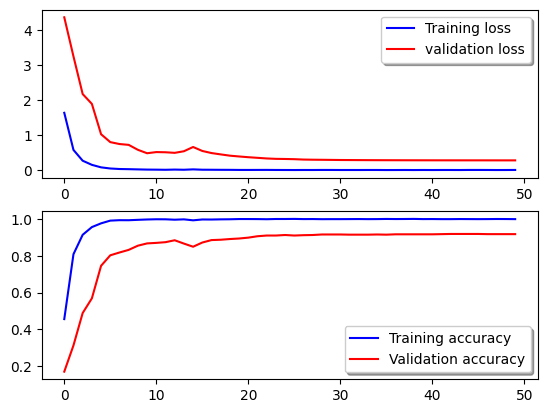

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.savefig("AUC.png")

  **DenseNet121**

In [ ]:
effnet =tf.keras.applications.DenseNet121(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

29084464/29084464 [==============================] - 2s 0us/step


In [ ]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(10,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:

#model.summary()

In [ ]:

model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(0.0001), metrics= ['accuracy'])

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs =50, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/50
106/106 [==============================] - ETA: 0s - loss: 1.8333 - accuracy: 0.4214
Epoch 1: val_accuracy improved from -inf to 0.70309, saving model to effnet.h5
106/106 [==============================] - 116s 263ms/step - loss: 1.8333 - accuracy: 0.4214 - val_loss: 0.8632 - val_accuracy: 0.7031 - lr: 1.0000e-04
Epoch 2/50
106/106 [==============================] - ETA: 0s - loss: 0.5676 - accuracy: 0.8132
Epoch 2: val_accuracy improved from 0.70309 to 0.84679, saving model to effnet.h5
106/106 [==============================] - 21s 202ms/step - loss: 0.5676 - accuracy: 0.8132 - val_loss: 0.4506 - val_accuracy: 0.8468 - lr: 1.0000e-04
Epoch 3/50
106/106 [==============================] - ETA: 0s - loss: 0.2333 - accuracy: 0.9299
Epoch 3: val_accuracy improved from 0.84679 to 0.87292, saving model to effnet.h5
106/106 [==============================] - 22s 205ms/step - loss: 0.2333 - accuracy: 0.9299 - val_loss: 0.3710 - val_accuracy: 0.8729 - lr: 1.0000e-04
Epoch 4/50
106/

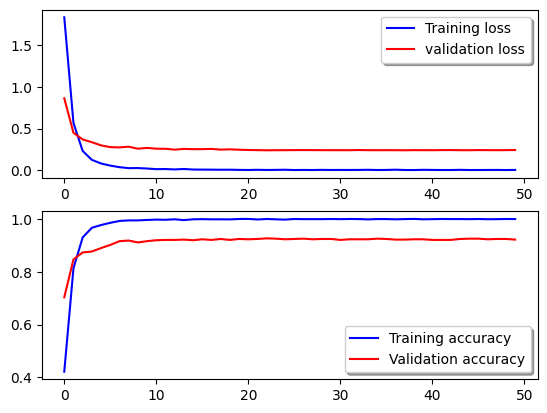

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.savefig("AUC.png")

predict

In [ ]:
Y_pred=model.predict(X_test)

27/27 [==============================] - 3s 46ms/step


In [ ]:
Y_pred[:10]

array([[9.9999881e-01, 6.2432420e-08, 3.5726249e-08, 3.7320934e-08,
        1.2458976e-09, 1.3257176e-07, 8.8615080e-09, 7.2547224e-10,
        9.9226378e-09, 7.6851319e-07],
       [9.9998546e-01, 3.6811182e-06, 8.4077448e-07, 7.6460537e-08,
        1.2739250e-07, 2.9985529e-06, 1.6538938e-06, 2.0098739e-06,
        1.3894805e-07, 2.9337211e-06],
       [9.4699441e-04, 1.0290095e-05, 5.6090441e-05, 1.5574468e-04,
        2.3636239e-05, 9.9863189e-01, 6.9115900e-05, 7.3927346e-05,
        5.8633768e-06, 2.6309250e-05],
       [4.7500216e-05, 7.8674396e-03, 4.2075939e-03, 2.5549703e-05,
        2.6949510e-06, 4.2270117e-06, 9.8769242e-01, 3.1900692e-07,
        1.2563946e-04, 2.6585862e-05],
       [2.8392501e-06, 8.3064191e-07, 4.0050517e-07, 1.2381203e-06,
        1.5381533e-05, 4.4396552e-06, 1.4510253e-08, 1.5517946e-06,
        7.5661073e-06, 9.9996579e-01],
       [9.9152692e-02, 4.5189849e-04, 1.4589018e-04, 8.8606459e-01,
        4.2272836e-04, 1.2422137e-02, 1.1947579e-03, 3.25

In [ ]:
y_class=[np.argmax(x) for x in Y_pred]

In [ ]:
y_class[:10]

[0, 0, 5, 6, 9, 3, 7, 8, 9, 5]

In [ ]:
y_test_new[:10]

[0, 0, 5, 6, 9, 0, 7, 8, 9, 6]

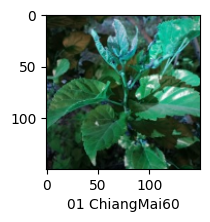

In [ ]:
plot_sample(X_test,y_test_new,5)

In [ ]:
classes[y_class[5]]

'04 BlackOodTurkey'

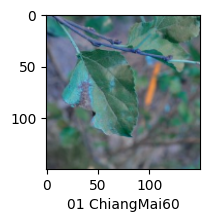

In [ ]:
plot_sample(X_train,y_test_new,1)

In [ ]:
classes[y_class[1]]

'01 ChiangMai60'

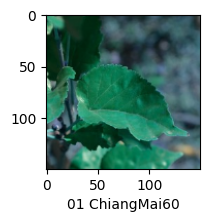

In [ ]:
plot_sample(X_train,y_test_new,0)

In [ ]:
classes[y_class[0]]

'01 ChiangMai60'

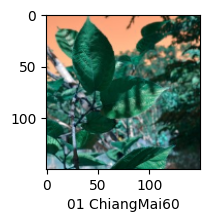

In [ ]:
plot_sample(X_train,y_test_new,11 )

In [ ]:
classes[y_class[11]]

'01 ChiangMai60'

Shap

In [ ]:
predictions = model.predict(x_test_each_class)
predicted_class = np.argmax(predictions, axis=1)
predicted_class

1/1 [==============================] - 0s 30ms/step


array([0, 1, 1, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
def plot_actual_predicted(images, pred_classes):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()

  # plot
  ax = axes[0]
  dummy_array = np.array([[[0, 0, 0, 0]]], dtype='uint8')
  ax.set_title("Base reference")
  ax.set_axis_off()
  ax.imshow(dummy_array, interpolation='nearest')
  # plot image
  for k,v in images.items():
    ax = axes[int(k)]
    ax.imshow(v, cmap=plt.cm.binary)
    ax.set_title(f"True: %s \nPredict: %s" % (classes[k], classes[pred_classes[k]]))
    ax.set_axis_off()
  plt.tight_layout()
  plt.show()


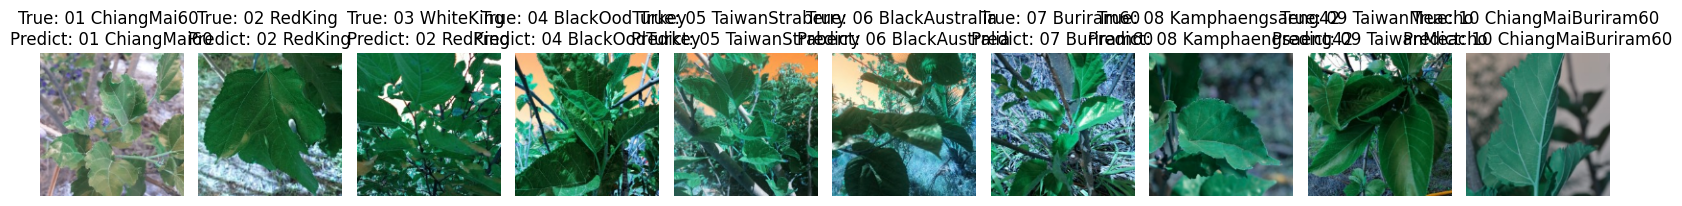

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_actual_predicted(images_dict, predicted_class)
plt.savefig('predited.png',dpi=300)
